In [1]:
import json
import requests
import numpy as np
import pandas as pd
import base64
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import ticker
import ipywidgets as widgets
from IPython.display import display
import re
import time
from selenium import webdriver

In [40]:
#Falta sacar resultados de mas tiempo pendiente de ver como usar: #https://es.investing.com/equities/morehistory
#Crear linea de resultados esperados para poder comparar con resultados obtenidos
#Añadir en el grafico un segundo eje Y a la derecha con el volumen
#Ver que hacer con las unidades de Billions y Millions


## Web Scraping

In [41]:
url='https://investing.com/equities'
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

html=requests.get(url,headers=headers).content
soup=BeautifulSoup(html,'lxml')

table = soup.find_all('table',{'id':'cross_rate_markets_stocks_1'})

In [42]:
table2=table[0]

In [43]:
rows=table2.find_all('tr')
rows=rows[1:]

In [44]:
titles = [row.a.get('title') for row in rows]
links = [row.a.get('href') for row in rows]

Diccionario con todas las empresas del IBEX

In [45]:
dict_companies = { titles[i] : links[i] for i in range(len(titles)) }

In [46]:
companies_dropdown=widgets.Dropdown(options=titles,description='Company:')
companies_dropdown

Dropdown(description='Company:', options=('Chevron Corp', 'Citigroup Inc', 'Bank of America Corp', 'AT&T Inc',…

In [73]:
company_web=dict_companies.get(companies_dropdown.value)
company_web

'/equities/tesla-motors'

### CREAT WIDGET PARA SELECCIONAR EMPRESA DEL DICCIONARIO Y ASIGNAR A UNA VARIABLE

In [74]:
#Publicacion resultados: https://es.investing.com/equities/apple-computer-inc-earnings
url=f'https://investing.com{company_web}-earnings'
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

#https://es.investing.com/equities/morehistory

html=requests.get(url,headers=headers).content
soup=BeautifulSoup(html,'lxml')

In [75]:
#table = soup.find_all('table',{'class':'genTbl openTbl ecoCalTbl earnings earningsPageTbl'})

In [76]:
name_api = soup.find_all('h1',{'class':'float_lang_base_1 relativeAttr'})
name_api = soup.find_all('h1',{'class':'float_lang_base_1 relativeAttr'})
name_api

[<h1 class="float_lang_base_1 relativeAttr" dir="ltr" itemprop="name">Tesla Inc (TSLA)	</h1>]

In [77]:
name_api = soup.find_all('h1',{'class':'float_lang_base_1 relativeAttr'})
name_api = name_api[0].text.strip().split('\n')
name_api=re.findall('\((.*)\)',name_api[0])
name_api=name_api[0]
name_api

'TSLA'

In [130]:

driver = webdriver.Chrome('/Users/inesgalofrebofill/Documents/Ironhack/chromedriver')  # Optional argument, if not specified will search path.
driver.get(f'https://investing.com{company_web}-earnings');
time.sleep(2) # Let the user actually see something!
search_box = driver.find_elements_by_id('showMoreEarningsHistory')[0]
search_box.click()
time.sleep(2)
search_box.click()
time.sleep(2)
search_box.click()
time.sleep(2)
search_box.click()

time.sleep(2)
df = pd.read_html(driver.page_source)[0]

time.sleep(2) # Let the user actually see something!
driver.quit()
df

,Release Date,Period End,EPS,/ Forecast,Revenue,/ Forecast.1
0,"Apr 29, 2020",03/2020,--,/ 0.92,--,/ 6.58B
1,"Jan 29, 2020",12/2019,2.14,/ 1.72,7.38B,"/ 7,020M"
2,"Oct 23, 2019",09/2019,1.86,/ -0.46,6.3B,/ 6.43B
3,"Jul 24, 2019",06/2019,-1.12,/ -0.35,6.35B,/ 6.47B
4,"Apr 24, 2019",03/2019,-2.9,/ -1.12,4.54B,/ 5.45B
5,"Jan 30, 2019",12/2018,1.93,/ 2.2,7.23B,/ 7.12B
6,"Oct 24, 2018",09/2018,2.9,/ -0.03,6.82B,/ 6.05B
7,"Aug 01, 2018",06/2018,-3.06,/ -2.88,4B,/ 3.99B
8,"May 02, 2018",03/2018,-3.35,/ -3.53,3.41B,/ 3.27B
9,"Feb 07, 2018",12/2017,-3.04,/ -3.12,3.29B,"/ 3,280M"


In [131]:
df2=df

In [239]:
df=df2

In [240]:
df=df[df.Revenue != '--']

In [241]:
#df=df.rename()

In [242]:
df['Release Date']=pd.to_datetime(df['Release Date']).dt.date
#df['Period End']='30/'+df['Period End']
df['Period_End']=pd.to_datetime(df['Period End']).dt.date
df=df.replace('[,]', '', regex=True)
df['Forecast_EPS']=df['/ Forecast'].replace('/', '', regex=True)
df['Revenue2']=df['Revenue'].replace('M', '', regex=True)
df['Revenue2']=df['Revenue2'].apply(lambda x: x.replace('.', '') if x.endswith('B') else x)
df['Revenue2']=df['Revenue2'].apply(lambda x: x.replace('B', '00') if x.endswith('B') and len(x)==3 else x)
df['Revenue2']=df['Revenue2'].apply(lambda x: x.replace('B', '000') if x.endswith('B') and len(x)==2 else x)
df['Revenue2']=df['Revenue2'].apply(lambda x: x.replace('B', '0') if x.endswith('B') else x)

df['Revenue2']=df['Revenue2'].astype(float)
df['Forecast_Revenue']=df['/ Forecast.1'].replace('/', '', regex=True)

df['Forecast_Revenue']=df['Forecast_Revenue'].replace('[M]', '', regex=True)
df['Forecast_Revenue']=df['Forecast_Revenue'].apply(lambda x: x.replace('.', '') if x.endswith('B') else x)
df['Forecast_Revenue']=df['Forecast_Revenue'].apply(lambda x: x.replace('B', '00') if x.endswith('B') and len(x)==3 else x)
df['Forecast_Revenue']=df['Forecast_Revenue'].apply(lambda x: x.replace('B', '000') if x.endswith('B') and len(x)==2 else x)
df['Forecast_Revenue']=df['Forecast_Revenue'].apply(lambda x: x.replace('B', '0') if x.endswith('B') else x)

df['Forecast_Revenue']=df['Forecast_Revenue'].astype(float)




df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Release Date,Period End,EPS,/ Forecast,Revenue,/ Forecast.1,Period_End,Forecast_EPS,Revenue2,Forecast_Revenue
1,2020-01-29,12/2019,2.14,/ 1.72,7.38B,/ 7020M,2019-12-01,1.72,7380.0,7020.00
2,2019-10-23,09/2019,1.86,/ -0.46,6.3B,/ 6.43B,2019-09-01,-0.46,6300.0,6430.00
3,2019-07-24,06/2019,-1.12,/ -0.35,6.35B,/ 6.47B,2019-06-01,-0.35,6350.0,6470.00
4,2019-04-24,03/2019,-2.9,/ -1.12,4.54B,/ 5.45B,2019-03-01,-1.12,4540.0,5450.00
5,2019-01-30,12/2018,1.93,/ 2.2,7.23B,/ 7.12B,2018-12-01,2.2,7230.0,7120.00
6,2018-10-24,09/2018,2.9,/ -0.03,6.82B,/ 6.05B,2018-09-01,-0.03,6820.0,6050.00
7,2018-08-01,06/2018,-3.06,/ -2.88,4B,/ 3.99B,2018-06-01,-2.88,4000.0,3990.00
8,2018-05-02,03/2018,-3.35,/ -3.53,3.41B,/ 3.27B,2018-03-01,-3.53,3410.0,3270.00
9,2018-02-07,12/2017,-3.04,/ -3.12,3.29B,/ 3280M,2017-12-01,-3.12,3290.0,3280.00
10,2017-11-01,09/2017,-2.92,/ -2.29,2.98B,/ 2948M,2017-09-01,-2.29,2980.0,2948.00


In [234]:
len(df['Revenue2'][2])

3

### API

In [95]:
#https://financialmodelingprep.com/developer/docs/companies-key-stats-free-api/#Python

#'https://financialmodelingprep.com/api/v3/historical-price-full/AAPL'


url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{name_api}'
response = requests.get(url)



In [96]:
result=response.json()
result
data=pd.DataFrame(json_normalize(result))

In [97]:
#data['historical'][0]

In [98]:
data2=json_normalize(data['historical'][0])
data2

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2015-02-19,205.00,212.44,203.75,211.71,211.71,5154100.0,5154100.0,-6.71,-3.273,209.30000,"February 19, 15",-0.03273
1,2015-02-20,210.78,217.60,209.81,217.11,217.11,5982100.0,5982100.0,-6.33,-3.003,214.84000,"February 20, 15",-0.03003
2,2015-02-23,215.66,218.20,206.33,207.34,207.34,8499800.0,8499800.0,8.32,3.858,210.62333,"February 23, 15",0.03858
3,2015-02-24,207.29,207.29,201.70,204.11,204.11,6584900.0,6584900.0,3.18,1.534,204.36667,"February 24, 15",0.01534
4,2015-02-25,204.94,207.14,202.58,203.76,203.76,3909500.0,3909500.0,1.18,0.576,204.49333,"February 25, 15",0.00576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2020-02-11,768.79,783.51,758.00,774.38,774.38,11697500.0,11697500.0,-5.59,-0.727,771.96333,"February 11, 20",-0.00727
1254,2020-02-12,777.87,789.75,763.37,767.29,767.29,12022500.0,12022500.0,10.58,1.360,773.47000,"February 12, 20",0.01360
1255,2020-02-13,741.84,818.00,735.00,804.00,804.00,26289300.0,26289300.0,-62.16,-8.379,785.66667,"February 13, 20",-0.08379
1256,2020-02-14,787.22,812.97,785.50,800.03,800.03,15693711.0,15693711.0,-12.81,-1.627,799.50000,"February 14, 20",-0.01627


In [99]:
data3=data2[['date','open','close','volume','change','changePercent','vwap']]
data3['date']=pd.to_datetime(data3['date']).dt.date

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [100]:
data3.head(5)

,date,open,close,volume,change,changePercent,vwap
0,2015-02-19,205.00,211.71,5154100.0,-6.71,-3.273,209.30000
1,2015-02-20,210.78,217.11,5982100.0,-6.33,-3.003,214.84000
2,2015-02-23,215.66,207.34,8499800.0,8.32,3.858,210.62333
3,2015-02-24,207.29,204.11,6584900.0,3.18,1.534,204.36667
4,2015-02-25,204.94,203.76,3909500.0,1.18,0.576,204.49333


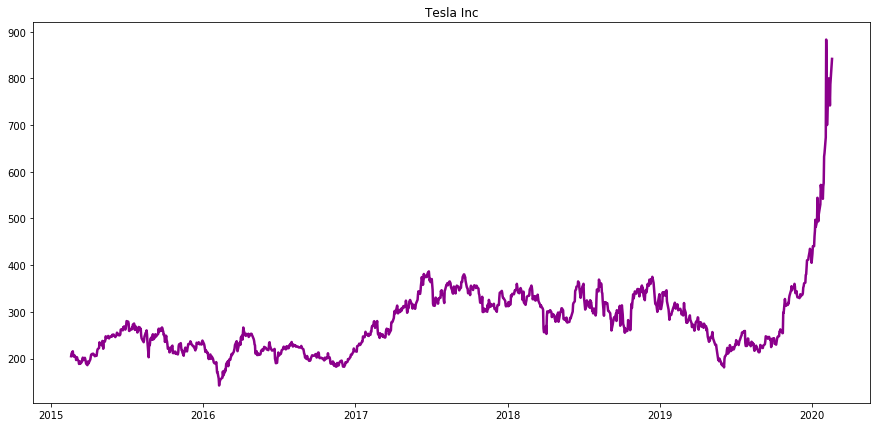

In [200]:
# Requirement 1
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(15,7),subplot_kw = {'title' :companies_dropdown.value})


ax.plot(data3.date,data3.open,
       linewidth=2.5,color='darkmagenta',label=2014)




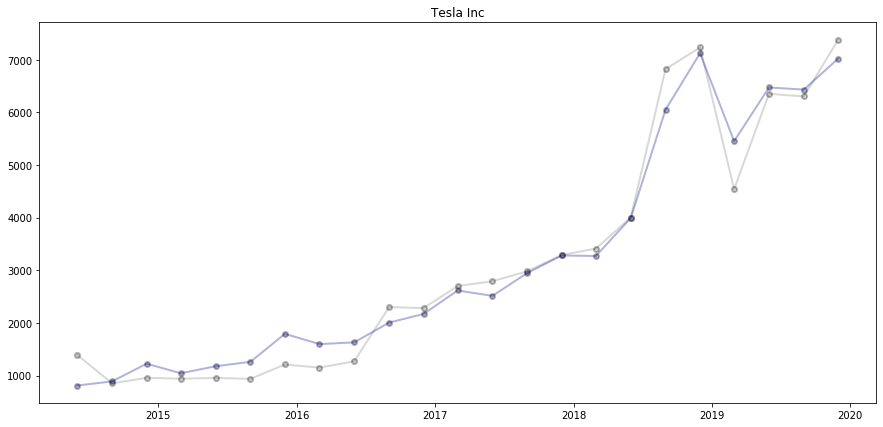

In [243]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(15,7),subplot_kw = {'title' :companies_dropdown.value})


ax.plot(df.Period_End,df.Revenue2,
        linewidth=2,
       color='grey',
       alpha=0.3,
        marker = 'o', 
        markersize = 5,
        markeredgecolor = 'black',
        markeredgewidth = 2)

ax.plot(df.Period_End,df.Forecast_Revenue,
        linewidth=2,
       color='darkblue',
       alpha=0.3,
        marker = 'o', 
        markersize = 5,
        markeredgecolor = 'black',
        markeredgewidth = 2)

